# EDA of a Youtube Channel's Analytics


In [23]:
# Initial Setup

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./Data/youtube_data.csv")
df.dtypes

Content                                object
Video title                            object
Video publish time                     object
Dislikes                              float64
Likes                                 float64
Average percentage viewed (%)         float64
Average view duration                  object
RPM (USD)                             float64
Views                                 float64
Watch time (hours)                    float64
Subscribers                           float64
Impressions                             int64
Impressions click-through rate (%)    float64
dtype: object

In [24]:
#Data Cleanup

# Step 1: Remove any rows with NaN data.
df.dropna(inplace=True)

#Step 2 Convert time data to float to make it easier to sort
df['time_in_seconds'] = pd.to_timedelta(df['Average view duration']).dt.total_seconds()

df.tail()

,Content,Video title,Video publish time,Dislikes,Likes,Average percentage viewed (%),Average view duration,RPM (USD),Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%),time_in_seconds
368,7S43MvFtdsk,I'm Playing Pokemon Violet!,"Nov 18, 2022",0.0,72.0,7.83,0:02:31,31.974,1425.0,60.0947,8.0,21496,4.75,151.0
370,A8ziZ-iydbo,2200 Elo Tryhard Laddering Almost at #1 | Road...,"Nov 8, 2022",0.0,38.0,16.04,0:00:39,0.768,841.0,9.1777,3.0,17261,2.27,39.0
371,OoTgkl9L_rI,They Added Little Cup Random Battles! Can we p...,"Jun 3, 2024",0.0,180.0,6.60,0:11:12,2.695,6078.0,1134.6643,-1.0,110689,3.45,672.0
373,UQ4JgCK-z1g,1600 to 2000 Elo | Climbing the Pokemon Showdo...,"Apr 18, 2024",0.0,241.0,8.40,0:12:37,3.243,6992.0,1471.6672,5.0,146336,3.08,757.0
380,3Q9M5sUthgk,Pokemon Showdown Had This Move Wrong for Years...,"Jul 12, 2022",-1.0,4072.0,77.45,0:01:39,0.366,86659.0,2405.0171,43.0,548047,11.74,99.0


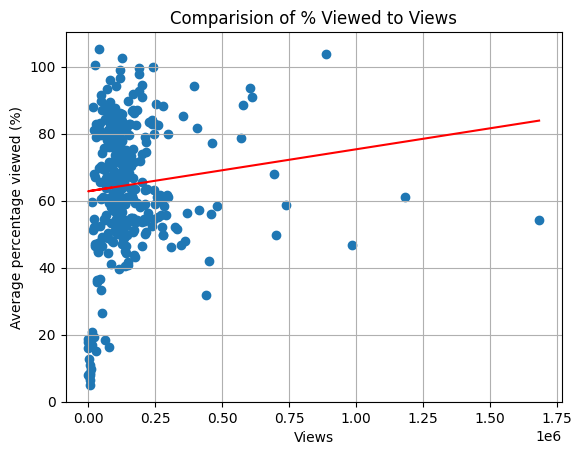

In [27]:
# Perform linear regression using numpy
import numpy as np

y = df['Average percentage viewed (%)']
x = df['Views']

# Calculate the coefficients
coefficients = np.polyfit(x, y, 1)  # 1st degree polynomial (linear)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

plt.scatter(x, y, label='Data Points')
plt.plot(x, y_fit, color='red', label='Best Fit Line')
# Show the plot
plt.ylabel('Average percentage viewed (%)')  # Optional: Label for the x-axis
plt.xlabel('Views')  # Optional: Label for the y-axis
plt.title('Comparision of % Viewed to Views')  # Optional: Title of the plot
plt.grid(True)  # Optional: Add grid lines to the plot

plt.show()

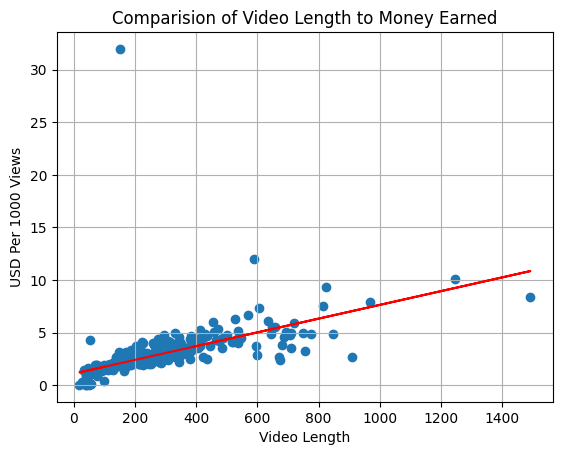

In [29]:
import numpy as np

x = df['time_in_seconds']
y = df['RPM (USD)']

# Calculate the coefficients
coefficients = np.polyfit(x, y, 1)  # 1st degree polynomial (linear)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

plt.scatter(x, y, label='Data Points')
plt.plot(x, y_fit, color='red', label='Best Fit Line')
# Show the plot
plt.xlabel('Video Length')  # Optional: Label for the x-axis
plt.ylabel('USD Per 1000 Views')  # Optional: Label for the y-axis
plt.title('Comparision of Video Length to Money Earned')  # Optional: Title of the plot
plt.grid(True)  # Optional: Add grid lines to the plot

plt.show()